# LA metro bike share introduction  
---
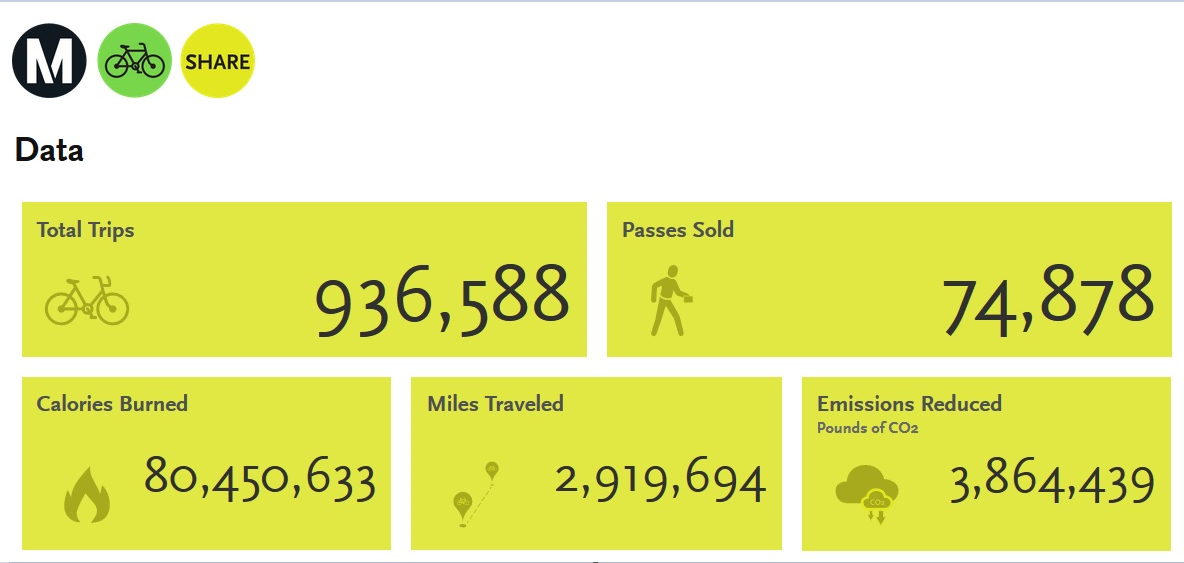

## Content :
 Bike Share data from LA Metro, pulled from https://bikeshare.metro.net/about/data/

## Context :
 This is a dataset hosted by the city of Los Angeles. The organization has an open data platform found here and they update their information according the amount of data that is brought in.

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
# download the zip with data's
! wget https://raw.githubusercontent.com/figolino/BikeShare/master/metro-bike-share-stations-2019-10-1.csv
! wget https://raw.githubusercontent.com/figolino/BikeShare/master/metro-bike-share-trips-2019-q3.csv

df = pd.read_csv('/content/metro-bike-share-trips-2019-q3.csv')
df.head()

--2020-01-12 20:55:26--  https://raw.githubusercontent.com/figolino/BikeShare/master/metro-bike-share-stations-2019-10-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12015 (12K) [text/plain]
Saving to: ‘metro-bike-share-stations-2019-10-1.csv.2’

metro-bike-share-st 100%[===================>]  11.73K  --.-KB/s    in 0.001s  

2020-01-12 20:55:26 (11.6 MB/s) - ‘metro-bike-share-stations-2019-10-1.csv.2’ saved [12015/12015]

--2020-01-12 20:55:28--  https://raw.githubusercontent.com/figolino/BikeShare/master/metro-bike-share-trips-2019-q3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


 ## Explore the structure of the dataset provided

In [6]:
display("Shape of dataframe: ", df.shape)
display(df.info())

'Shape of dataframe: '

(92122, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92122 entries, 0 to 92121
Data columns (total 15 columns):
trip_id                92122 non-null int64
duration               92122 non-null int64
start_time             92122 non-null object
end_time               92122 non-null object
start_station          92122 non-null int64
start_lat              89985 non-null float64
start_lon              89985 non-null float64
end_station            92122 non-null int64
end_lat                88052 non-null float64
end_lon                88052 non-null float64
bike_id                92122 non-null int64
plan_duration          92122 non-null int64
trip_route_category    92122 non-null object
passholder_type        92122 non-null object
bike_type              92122 non-null object
dtypes: float64(4), int64(6), object(5)
memory usage: 10.5+ MB


None

In [7]:
# Checking for null values
display(df.isna().sum())

# describe dat
display(round(df.describe(),2))

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2137
start_lon              2137
end_station               0
end_lat                4070
end_lon                4070
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration
count,9.212200e+04,92122.00,92122.00,89985.00,89985.00,92122.00,88052.00,88052.00,92122.00,92122.00
mean,1.274286e+08,33.17,3484.91,34.03,-118.29,3480.28,34.03,-118.29,14470.13,60.28
std,1.524147e+06,129.06,611.49,0.06,0.07,609.95,0.06,0.07,4658.74,111.13
min,1.246571e+08,1.00,3000.00,33.71,-118.50,3000.00,33.71,-118.50,5715.00,1.00
25%,1.261374e+08,6.00,3029.00,34.04,-118.28,3028.00,34.04,-118.28,12139.00,1.00
50%,1.274911e+08,12.00,3062.00,34.05,-118.26,3062.00,34.05,-118.26,16307.00,30.00
75%,1.287379e+08,22.00,4285.00,34.05,-118.25,4285.00,34.05,-118.25,17584.00,30.00
max,1.303877e+08,1440.00,4453.00,34.18,-118.23,4453.00,34.18,-118.23,19974.00,999.00


### Passholder Type : 
The name of the passholder's plan.
The following table shows the popularity of different Passholder plans.

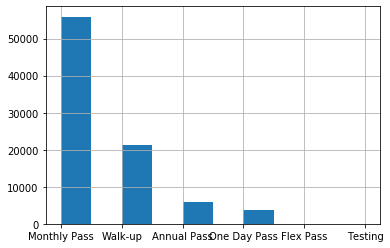

In [8]:
df = df.dropna()
#display(df['passholder_type'].unique())
display(df['passholder_type'].hist())

### Plan Duration:
The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up). The most popular plan duration is monthly, followed by Single Ride  and then yearly. We can covert the factor levels to more descriptive one namely, 30 with Monthly, 365 with Yearly and rest as Single Ride.  

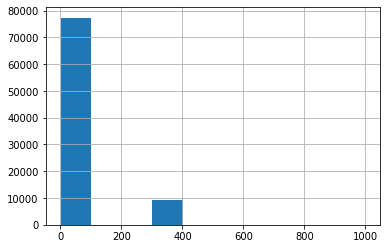

In [9]:
display(df['plan_duration'].hist())

### Trip Route Category :
"Round Trip" for trips starting and ending at the same station or "One Way" for all other trips. One way trip clearly rules with more than 90% users preferring it.

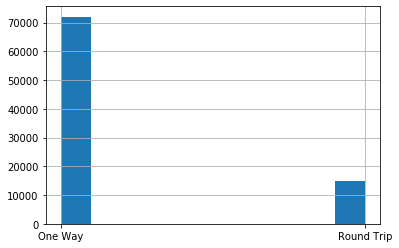

In [10]:
# Data Formatting
df['trip_route_category_c'] = df['trip_route_category'].astype('category')
display(df['trip_route_category_c'].hist())

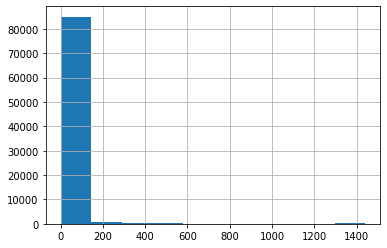

In [11]:
# Univariate graphs to see the distribution of Duration
display(df['duration'].hist())

26.99640387275242

95.72057864407243

1440

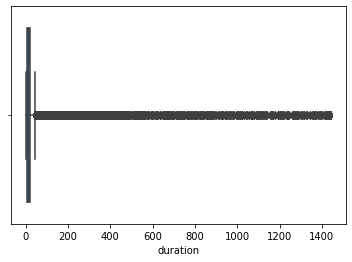

In [12]:
display(sns.boxplot(df['duration']))
display(df['duration'].mean(), df['duration'].std(), df['duration'].max())

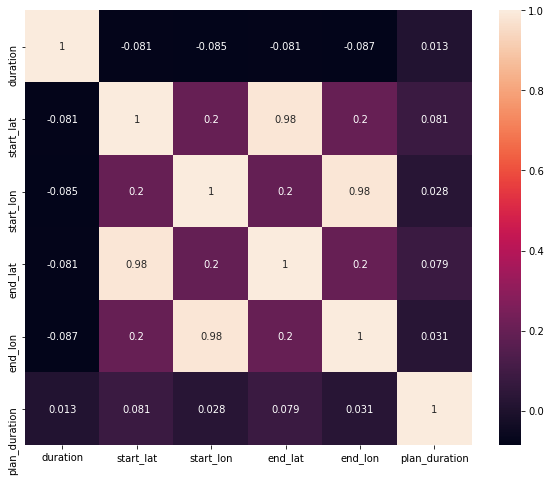

In [13]:
# Correlation Matrix drop some ID 
temp_df=df.drop(columns=['trip_id','start_station','end_station','bike_id'])

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

Let’s drop any trips where a trip lasted less than 90 seconds and the start station == end station. Instead of 90 seconds we can use 25% percentile = 360 seconds.

In [0]:
# Remove data where duration is less than 90 seconds and start station == send station
df = df.drop(df.index[(df['duration'] < 90) & (df['start_lat'] == df['end_lat'])])

<a id='section1'></a>
## 1. Top 5 stations with the most starts (showing # of starts)

In [0]:
#Data for Top 5 Stations visual
top5 = pd.DataFrame()
top5['Station'] = df['start_station'].value_counts().head().index
top5['Number of Starts']=df['start_station'].value_counts().head().values
top5['Station'] = top5['Station'].astype('category')
top5['Station'] = top5.Station.cat.remove_unused_categories()

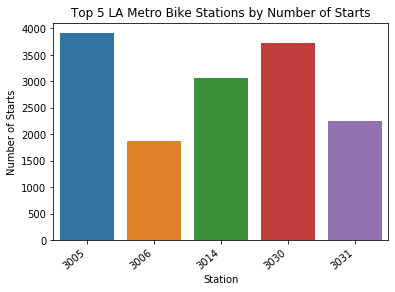

In [16]:
# Plot the top 5 stations
sns.barplot('Station', 'Number of Starts', data = top5)
plt.xticks(rotation=40, ha = 'right')
plt.title("Top 5 LA Metro Bike Stations by Number of Starts")
plt.show()

<a id='section2'></a>
## 2. Trip Duration by User Type

In [0]:
# Calculate trip duration based on tripduration(Seconds)
TD_user = pd.DataFrame()
TD_user['Avg. Trip Duration'] = round(df.groupby('passholder_type')['duration'].mean(),2)
TD_user = TD_user.reset_index()
TD_user['Passholder Type'] = TD_user['passholder_type'].astype('object')

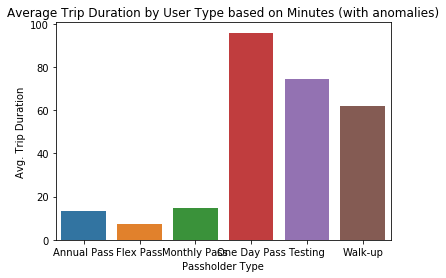

In [18]:
# Average Trip Duration by User Type (with anomalies)
g = sns.barplot('Passholder Type', 'Avg. Trip Duration', data = TD_user)
plt.Figure(figsize=(12,10))
plt.title("Average Trip Duration by User Type based on Minutes (with anomalies)")
plt.show()

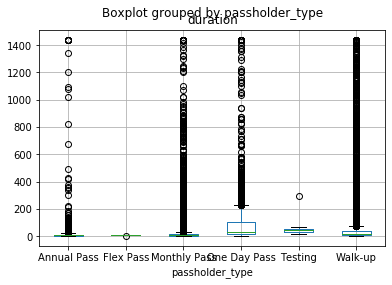

In [19]:
#Boxplots are more informative to visualize breakdown of data
df.boxplot('duration', by = 'passholder_type')
plt.show()

<a id='section3'></a>
## 3. Most Popular Trip

In [0]:
trips_df = pd.DataFrame()
trips_df = df.groupby(['start_station','end_station']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df['start_station'] = trips_df['start_station'].astype('str')
trips_df['end_station'] = trips_df['end_station'].astype('str')
trips_df["trip"] = trips_df["start_station"] + " to " + trips_df["end_station"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['start_station', "end_station"], axis = 1)
trips_df = trips_df.reset_index()

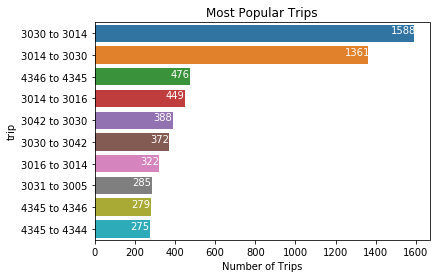

In [21]:
# Most popular trips
g = sns.barplot('Number of Trips','trip', data = trips_df)
plt.title("Most Popular Trips")
for index, row in trips_df.iterrows():
    g.text(row['Number of Trips']-50,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()

<a id='section4'></a>
## 4. Busiest Bike by Times and Minutes Used

In [0]:
bike_use_df = pd.DataFrame()
bike_use_df = df.groupby(['bike_id']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['bike_id'] = bike_use_df['bike_id'].astype(str)
bike_use_df['bike_id'] = ('Bike ' + bike_use_df['bike_id'])
bike_use_df = bike_use_df.reset_index()

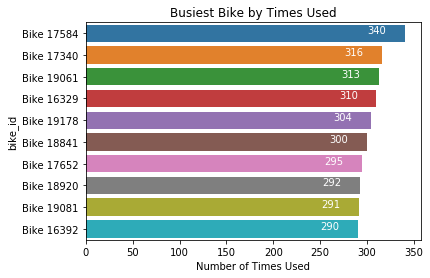

In [23]:
#Visual of most used bike based on Number of Trips
g = sns.barplot('Number of Times Used','bike_id', data = bike_use_df)
plt.title("Busiest Bike by Times Used")
for index, row in bike_use_df.iterrows():
    g.text(row['Number of Times Used']-30,index,row['Number of Times Used'], 
             color='white', ha="center",fontsize = 10)
plt.show()
